In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing import image
from keras.applications import  vgg16,vgg19,xception,mobilenet, resnet
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
import os

In [56]:
PATH = r"C://Users//serde//images//"
similarity_matrix_path=r'C:\Users\serde\OneDrive\Masaüstü\bitirme\benzerlik_matrisi.csv'

In [3]:
df=pd.read_csv(r"C:\Users\serde\OneDrive\Masaüstü\bitirme\benzerlik_matrisi.csv")

In [4]:
df

,Unnamed: 0,C://Users//serde//images//194508109.jpg,C://Users//serde//images//188778349.jpg,C://Users//serde//images//188977857.jpg,C://Users//serde//images//194942557.jpg,C://Users//serde//images//194941874.jpg,C://Users//serde//images//103135174.jpg,C://Users//serde//images//107307153.jpg,C://Users//serde//images//124815566.jpg,C://Users//serde//images//125624471.jpg,...,C://Users//serde//images//179667248.jpg,C://Users//serde//images//159882345.jpg,C://Users//serde//images//159882467.jpg,C://Users//serde//images//150424777.jpg,C://Users//serde//images//187320580.jpg,C://Users//serde//images//190070229.jpg,C://Users//serde//images//189165560.jpg,C://Users//serde//images//190070434.jpg,C://Users//serde//images//177433619.jpg,C://Users//serde//images//154161576.jpg
0,C://Users//serde//images//194508109.jpg,1.000000,0.432225,0.344396,0.206969,0.430806,0.450029,0.215427,0.559886,0.395935,...,0.490375,0.257883,0.504275,0.245559,0.539345,0.658339,0.182106,0.232260,0.556683,0.214233
1,C://Users//serde//images//188778349.jpg,0.432225,1.000000,0.314024,0.301817,0.338020,0.367407,0.362292,0.389130,0.360999,...,0.354146,0.369941,0.370087,0.325215,0.327786,0.344428,0.265958,0.210578,0.284891,0.288212
2,C://Users//serde//images//188977857.jpg,0.344396,0.314024,1.000000,0.400699,0.403618,0.529542,0.309384,0.434006,0.428885,...,0.488311,0.415298,0.343417,0.300167,0.258353,0.354759,0.314934,0.283305,0.324115,0.304795
3,C://Users//serde//images//194942557.jpg,0.206969,0.301817,0.400699,1.000000,0.249137,0.245561,0.404828,0.226838,0.244531,...,0.223380,0.286974,0.176296,0.297456,0.174348,0.215461,0.441317,0.233399,0.204544,0.158347
4,C://Users//serde//images//194941874.jpg,0.430806,0.338020,0.403618,0.249137,1.000000,0.342590,0.399930,0.434627,0.382795,...,0.349375,0.276963,0.294501,0.377467,0.242391,0.440572,0.265103,0.414701,0.321391,0.238879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21477,C://Users//serde//images//190070229.jpg,0.658339,0.344428,0.354759,0.215461,0.440572,0.516757,0.263921,0.576655,0.501262,...,0.640658,0.310103,0.582263,0.338236,0.664633,1.000000,0.265686,0.251796,0.760803,0.234264
21478,C://Users//serde//images//189165560.jpg,0.182106,0.265958,0.314934,0.441317,0.265103,0.381189,0.407710,0.262040,0.392102,...,0.311670,0.338852,0.213397,0.473083,0.232018,0.265686,1.000000,0.216338,0.204006,0.220647
21479,C://Users//serde//images//190070434.jpg,0.232260,0.210578,0.283305,0.233399,0.414701,0.206430,0.231217,0.315761,0.268410,...,0.259551,0.286695,0.266253,0.276530,0.218777,0.251796,0.216338,1.000000,0.192782,0.275608
21480,C://Users//serde//images//177433619.jpg,0.556683,0.284891,0.324115,0.204544,0.321391,0.502821,0.205995,0.477203,0.394293,...,0.518595,0.261617,0.427412,0.256749,0.562479,0.760803,0.204006,0.192782,1.000000,0.209817


In [5]:
df.set_index('Unnamed: 0', inplace=True)

In [6]:
df

,C://Users//serde//images//194508109.jpg,C://Users//serde//images//188778349.jpg,C://Users//serde//images//188977857.jpg,C://Users//serde//images//194942557.jpg,C://Users//serde//images//194941874.jpg,C://Users//serde//images//103135174.jpg,C://Users//serde//images//107307153.jpg,C://Users//serde//images//124815566.jpg,C://Users//serde//images//125624471.jpg,C://Users//serde//images//178357420.jpg,...,C://Users//serde//images//179667248.jpg,C://Users//serde//images//159882345.jpg,C://Users//serde//images//159882467.jpg,C://Users//serde//images//150424777.jpg,C://Users//serde//images//187320580.jpg,C://Users//serde//images//190070229.jpg,C://Users//serde//images//189165560.jpg,C://Users//serde//images//190070434.jpg,C://Users//serde//images//177433619.jpg,C://Users//serde//images//154161576.jpg
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
C://Users//serde//images//194508109.jpg,1.000000,0.432225,0.344396,0.206969,0.430806,0.450029,0.215427,0.559886,0.395935,0.510319,...,0.490375,0.257883,0.504275,0.245559,0.539345,0.658339,0.182106,0.232260,0.556683,0.214233
C://Users//serde//images//188778349.jpg,0.432225,1.000000,0.314024,0.301817,0.338020,0.367407,0.362292,0.389130,0.360999,0.429185,...,0.354146,0.369941,0.370087,0.325215,0.327786,0.344428,0.265958,0.210578,0.284891,0.288212
C://Users//serde//images//188977857.jpg,0.344396,0.314024,1.000000,0.400699,0.403618,0.529542,0.309384,0.434006,0.428885,0.413670,...,0.488311,0.415298,0.343417,0.300167,0.258353,0.354759,0.314934,0.283305,0.324115,0.304795
C://Users//serde//images//194942557.jpg,0.206969,0.301817,0.400699,1.000000,0.249137,0.245561,0.404828,0.226838,0.244531,0.328360,...,0.223380,0.286974,0.176296,0.297456,0.174348,0.215461,0.441317,0.233399,0.204544,0.158347
C://Users//serde//images//194941874.jpg,0.430806,0.338020,0.403618,0.249137,1.000000,0.342590,0.399930,0.434627,0.382795,0.442978,...,0.349375,0.276963,0.294501,0.377467,0.242391,0.440572,0.265103,0.414701,0.321391,0.238879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C://Users//serde//images//190070229.jpg,0.658339,0.344428,0.354759,0.215461,0.440572,0.516757,0.263921,0.576655,0.501262,0.464339,...,0.640658,0.310103,0.582263,0.338236,0.664633,1.000000,0.265686,0.251796,0.760803,0.234264
C://Users//serde//images//189165560.jpg,0.182106,0.265958,0.314934,0.441317,0.265103,0.381189,0.407710,0.262040,0.392102,0.267571,...,0.311670,0.338852,0.213397,0.473083,0.232018,0.265686,1.000000,0.216338,0.204006,0.220647
C://Users//serde//images//190070434.jpg,0.232260,0.210578,0.283305,0.233399,0.414701,0.206430,0.231217,0.315761,0.268410,0.472752,...,0.259551,0.286695,0.266253,0.276530,0.218777,0.251796,0.216338,1.000000,0.192782,0.275608


In [20]:
first_25_column  = df.iloc[:25 , :25]

In [22]:
first_25_column.columns=["Img"+str(i) for i in range(1, 26)]

In [23]:
first_25_column.index=["Img"+str(i) for i in range(1, 26)]

In [24]:
first_25_column

,Img1,Img2,Img3,Img4,Img5,Img6,Img7,Img8,Img9,Img10,...,Img16,Img17,Img18,Img19,Img20,Img21,Img22,Img23,Img24,Img25
Img1,1.000000,0.432225,0.344396,0.206969,0.430806,0.450029,0.215427,0.559886,0.395935,0.510319,...,0.286701,0.275396,0.349898,0.487580,0.238100,0.228535,0.306071,0.558241,0.483921,0.377119
Img2,0.432225,1.000000,0.314024,0.301817,0.338020,0.367407,0.362292,0.389130,0.360999,0.429185,...,0.226866,0.467292,0.279897,0.406720,0.355119,0.288059,0.308840,0.367850,0.453601,0.398560
Img3,0.344396,0.314024,1.000000,0.400699,0.403618,0.529542,0.309384,0.434006,0.428885,0.413670,...,0.618112,0.302306,0.323780,0.498111,0.249563,0.260146,0.382223,0.365441,0.449506,0.501118
Img4,0.206969,0.301817,0.400699,1.000000,0.249137,0.245561,0.404828,0.226838,0.244531,0.328360,...,0.201445,0.448343,0.231762,0.249367,0.512267,0.310330,0.593914,0.207125,0.276761,0.211554
Img5,0.430806,0.338020,0.403618,0.249137,1.000000,0.342590,0.399930,0.434627,0.382795,0.442978,...,0.387152,0.352884,0.304963,0.434652,0.206936,0.251402,0.352349,0.413076,0.334141,0.319948
Img6,0.450029,0.367407,0.529542,0.245561,0.342590,1.000000,0.301232,0.516206,0.741812,0.331433,...,0.361988,0.303846,0.245359,0.377073,0.263859,0.215530,0.302606,0.482882,0.431452,0.800661
Img7,0.215427,0.362292,0.309384,0.404828,0.399930,0.301232,1.000000,0.213522,0.338903,0.257702,...,0.221149,0.572896,0.254255,0.277869,0.371582,0.225139,0.312984,0.258634,0.340375,0.242054
Img8,0.559886,0.389130,0.434006,0.226838,0.434627,0.516206,0.213522,1.000000,0.401833,0.424434,...,0.484272,0.208188,0.262479,0.487259,0.248501,0.228547,0.309101,0.592072,0.537625,0.543034
Img9,0.395935,0.360999,0.428885,0.244531,0.382795,0.741812,0.338903,0.401833,1.000000,0.333609,...,0.278797,0.336770,0.303392,0.415583,0.299401,0.308217,0.282624,0.451218,0.377121,0.653684
Img10,0.510319,0.429185,0.413670,0.328360,0.442978,0.331433,0.257702,0.424434,0.333609,1.000000,...,0.322482,0.354325,0.396846,0.543943,0.328910,0.345114,0.406936,0.511962,0.537556,0.308431


<AxesSubplot:title={'center':'Heatmap representation of the similarity matrix'}>

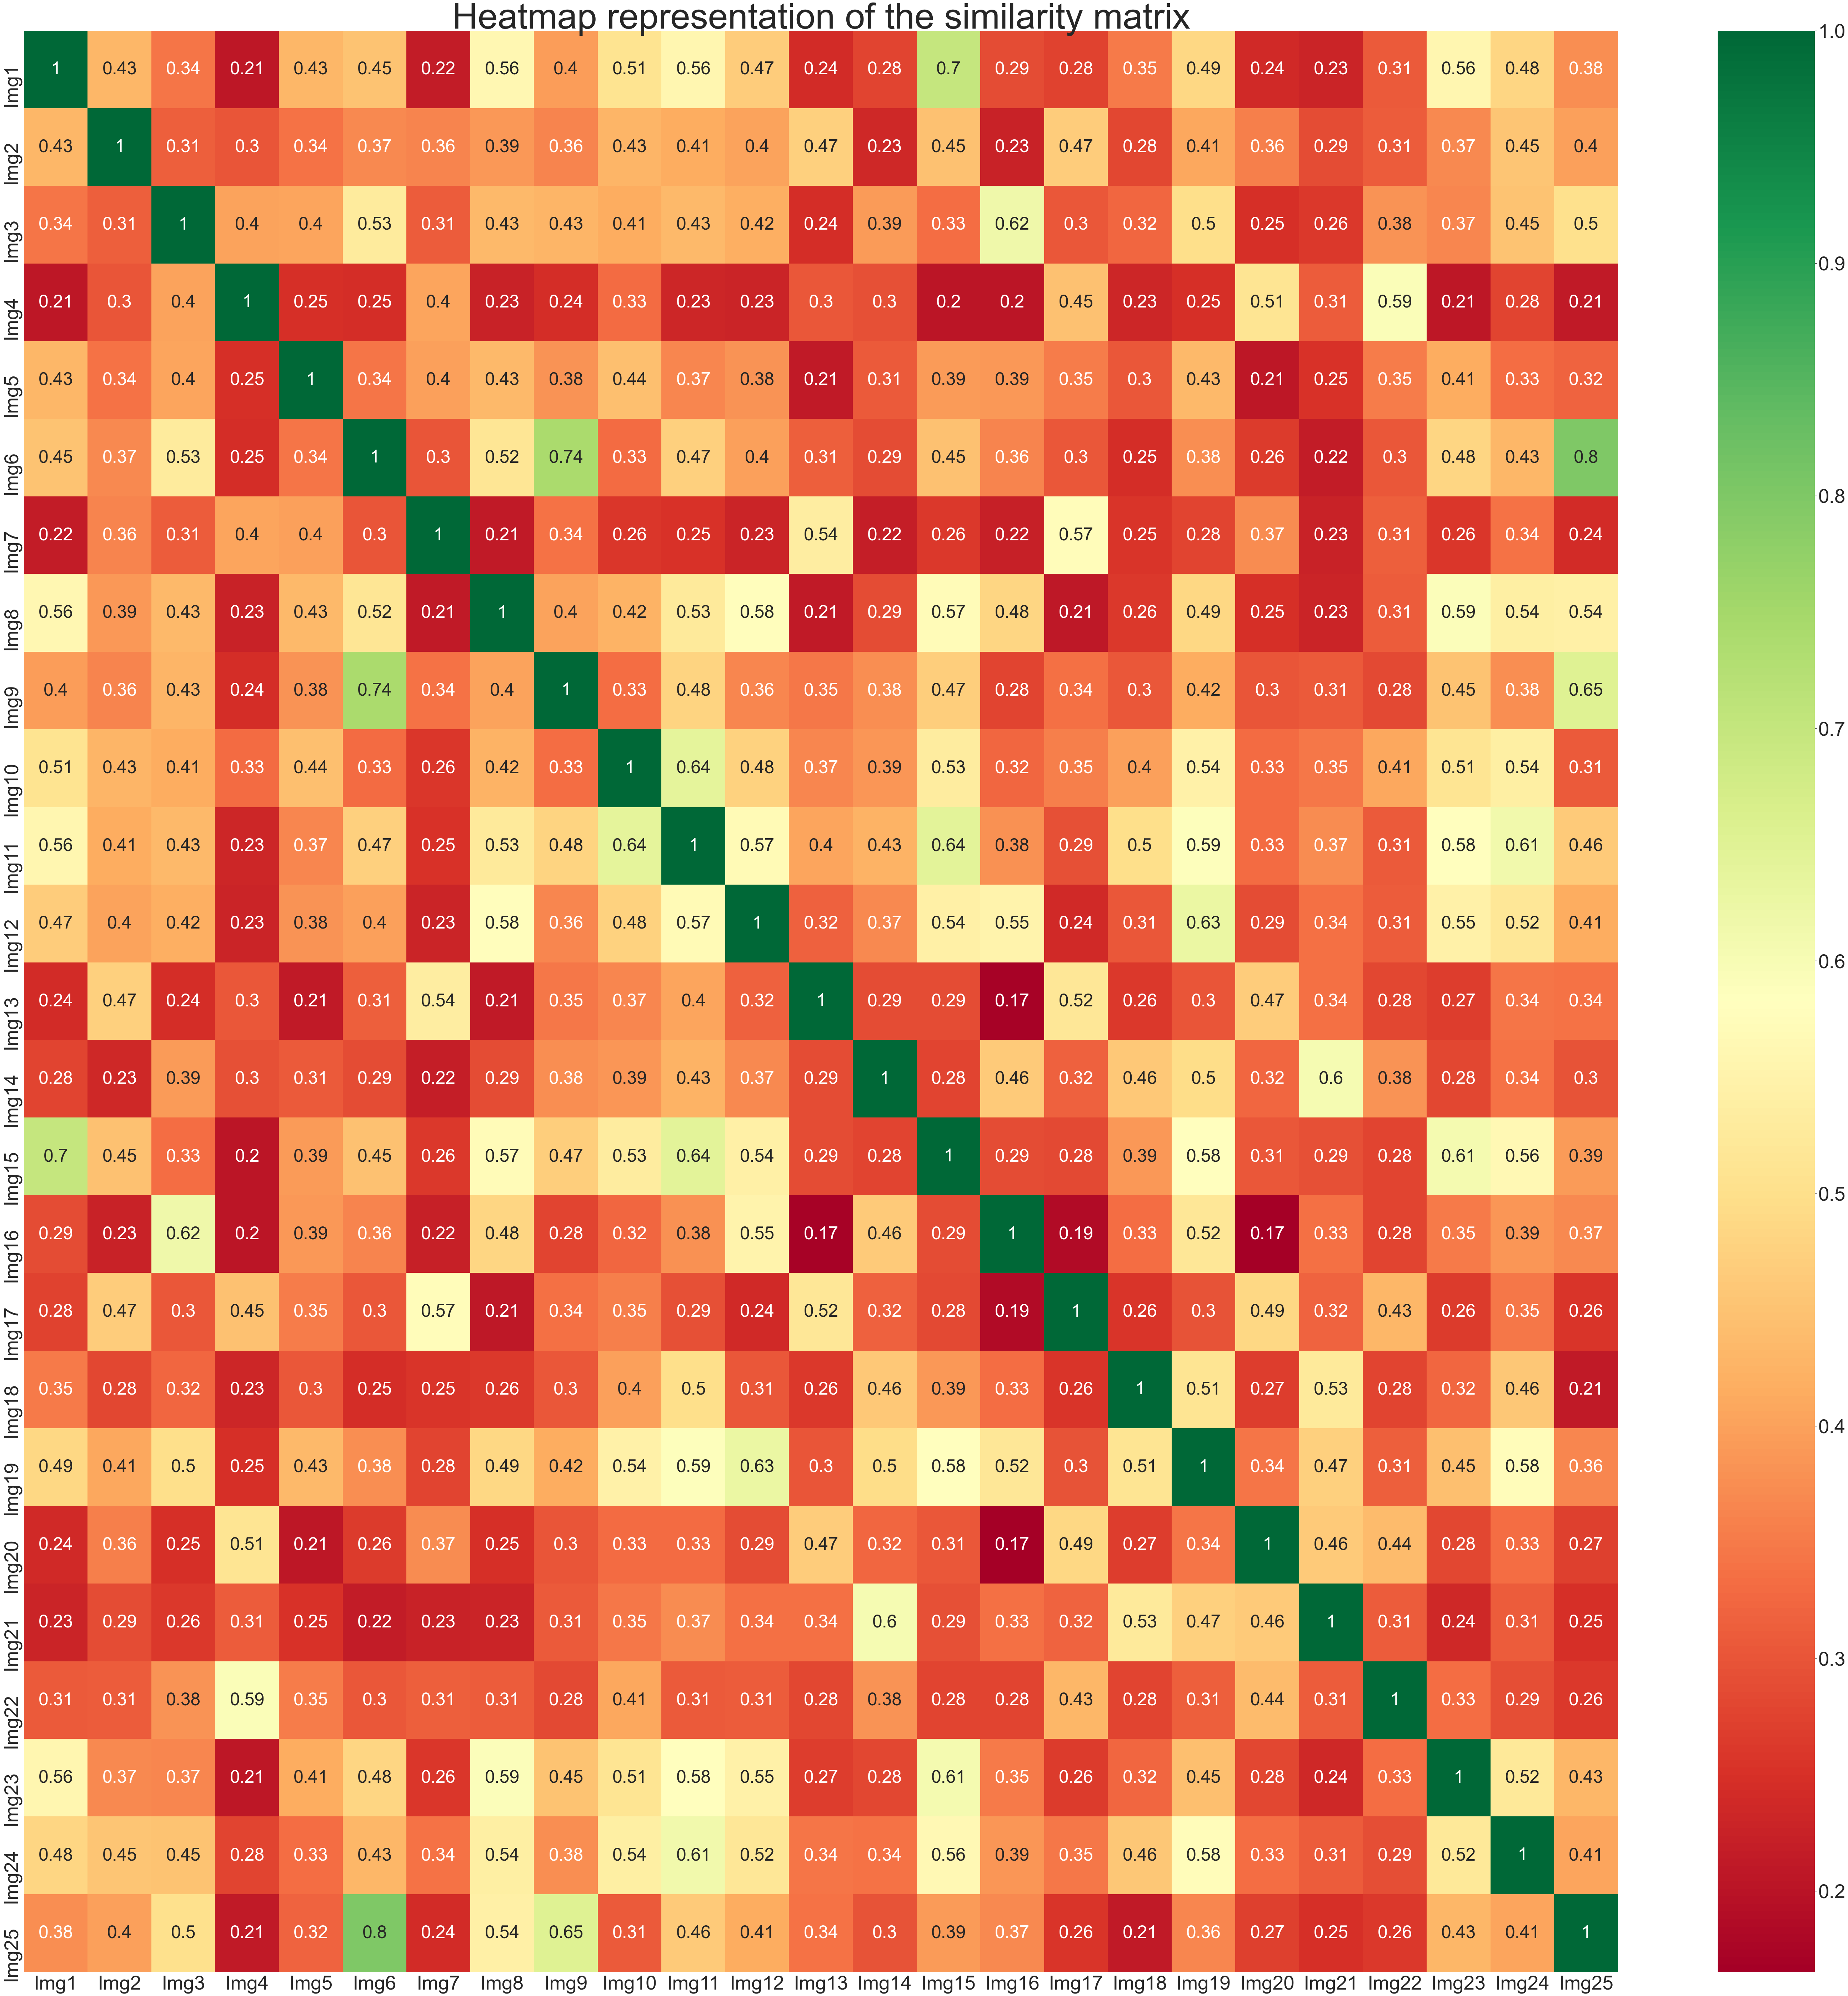

In [38]:
import seaborn as sns 
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(100,100)) 
ax.set_title('Heatmap representation of the similarity matrix', fontsize =100)
sns.heatmap(first_25_column, cmap ='RdYlGn', annot=True, annot_kws={'size': 50}, ax=ax)